In [4]:
from sklearn.model_selection import GridSearchCV
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import uniform, expon

In [5]:
train_dataset_path = 'C:/Users/katsa/OneDrive/Jupyter_files/shallow_models_cic_nb15/nb_all_feat_train_dataset.csv'
nb_train_dataset = pd.read_csv(train_dataset_path)
print(len(nb_train_dataset))
nb_train_dataset = nb_train_dataset.sample(frac=1/100)
print(len(nb_train_dataset))
X_train, y_train = nb_train_dataset.iloc[:, :-1], nb_train_dataset['Label']

406407
4064


In [6]:
# Create a pipeline with SimpleImputer, StandardScaler, and DecisionTreeClassifier
pipeline = Pipeline([
    ('imputer', SimpleImputer()),
    ('scaler', StandardScaler()),
    ('clf', SVC())
])

# Define the hyperparameter grid to search over
param_grid = {
    'clf__gamma': [0.001, 0.01, 0.1, 1],
    #'clf__kernel': ['linear', 'poly', 'rbf', 'sigmoid'],
    'clf__C': [0.1, 1, 10, 100]
}

# # Create a GridSearchCV object with the pipeline and hyperparameter grid
# grid_search = GridSearchCV(pipeline, param_grid=param_grid, cv=5)
# # Fit the GridSearchCV object on your training data
# grid_search.fit(X_train, y_train)

# Print the best hyperparameters and corresponding score
# print("Best parameters: {}".format(grid_search.best_params_))
# print("Best score: {:.2f}".format(grid_search.best_score_))

# Perform randomized search
random_search = RandomizedSearchCV(pipeline, param_grid, n_iter=10, cv=5)
random_search.fit(X_train, y_train)

best_params = random_search.best_params_
best_model = random_search.best_estimator_
best_score = random_search.best_score_

print("Best parameters: {}".format(best_params))
print("Best estimator: {}".format(best_model))
print("Best score: {:.2f}".format(best_score))

Best parameters: {'clf__gamma': 0.001, 'clf__C': 1}
Best estimator: Pipeline(steps=[('imputer', SimpleImputer()), ('scaler', StandardScaler()),
                ('clf', SVC(C=1, gamma=0.001))])
Best score: 0.98


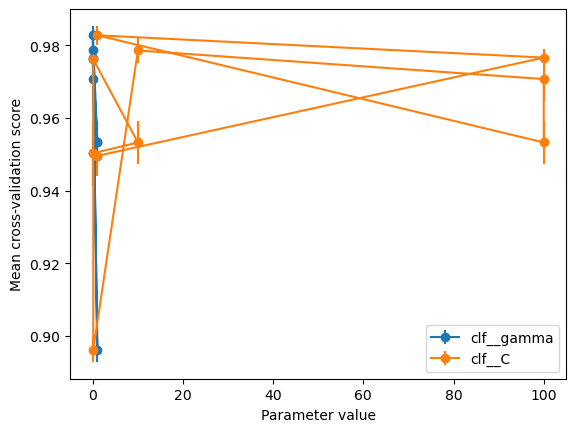

In [7]:
# assume you have already created and fitted the grid search object 'grid_search'

# convert cv_results_ to a pandas DataFrame
# results_df = pd.DataFrame(grid_search.cv_results_)
results_df = pd.DataFrame(random_search.cv_results_)

# extract the relevant columns
param_cols = [col for col in results_df.columns if col.startswith('param_')]
mean_test_score = 'mean_test_score'
std_test_score = 'std_test_score'

# plot the mean test score and standard deviation for each parameter setting
fig, ax = plt.subplots()
for col in param_cols:
    df = results_df[[col, mean_test_score, std_test_score]].dropna()
    param_name = col.replace('param_', '')
    param_values = df[col]
    ax.errorbar(param_values, df[mean_test_score], yerr=df[std_test_score], label=param_name, fmt='-o')
ax.set_xlabel('Parameter value')
ax.set_ylabel('Mean cross-validation score')
ax.legend()
plt.show()